In [5]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Init perceptron
weights = np.random.randn(2)
bias = np.random.randn()
lr = 0.1
epochs = 50
history = []

def step(x):
    return 1 if x > 0 else 0

# Train and log
for _ in range(epochs):
    for xi, target in zip(X, y):
        output = step(np.dot(xi, weights) + bias)
        error = target - output
        weights += lr * error * xi
        bias += lr * error
    history.append((weights.copy(), bias))

# Plot setup
fig, ax = plt.subplots()
x_vals = np.linspace(-0.5, 1.5, 100)
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=100, edgecolors='k')
line, = ax.plot([], [], 'k--')

ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)
ax.set_title("MCP Perceptron Learning XOR")

def update(frame):
    w, b = history[frame]
    if w[1] != 0:
        slope = -w[0] / w[1]
        intercept = -b / w[1]
        y_vals = slope * x_vals + intercept
        line.set_data(x_vals, y_vals)
    else:
        line.set_data([], [])
    ax.set_title(f"Epoch {frame+1}")
    return line,

# ✅ Assign to a persistent variable
anim = FuncAnimation(fig, update, frames=len(history), interval=300, repeat=True)

plt.show()


<IPython.core.display.Javascript object>

In [7]:
# Requires `pillow` (for GIF) or `ffmpeg` (for MP4)
anim.save("xor_animation.gif", writer="pillow")


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Sigmoid with thresholding
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def threshold(x):
    return 1 if x >= 0.5 else 0

# Forward pass function
def forward(x1, x2):
    # Inputs to hidden layer
    h1_input = x1 * 20 + x2 * 20 + (-10)
    h2_input = x1 * -20 + x2 * -20 + (30)
    h1_output = threshold(sigmoid(h1_input))
    h2_output = threshold(sigmoid(h2_input))
    
    # Hidden to output layer
    y_input = h1_output * 20 + h2_output * 20 + (-30)
    y_output = threshold(sigmoid(y_input))
    
    return h1_output, h2_output, y_output

# Test all possible inputs
print("x1 x2 | h1 h2 | y")
for x1 in [0, 1]:
    for x2 in [0, 1]:
        h1_out, h2_out, y_out = forward(x1, x2)
        print(f" {x1}  {x2}  |  {h1_out}  {h2_out}  | {y_out}")

# Create the graph
G = nx.DiGraph()

# Add nodes
G.add_node("x1", layer="input")
G.add_node("x2", layer="input")
G.add_node("h1", layer="hidden")
G.add_node("h2", layer="hidden")
G.add_node("y", layer="output")

# Add edges with weights
G.add_edge("x1", "h1", weight=20)
G.add_edge("x2", "h1", weight=20)
G.add_edge("x1", "h2", weight=-20)
G.add_edge("x2", "h2", weight=-20)
G.add_edge("h1", "y", weight=20)
G.add_edge("h2", "y", weight=20)

# Node positions
pos = {
    "x1": (-1, 1),
    "x2": (-1, -1),
    "h1": (0, 1),
    "h2": (0, -1),
    "y": (1, 0)
}

fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue',
        font_size=12, font_weight='bold', arrows=True, ax=ax)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', ax=ax)

# Biases
ax.text(0, 1.2, "bias=-10", fontsize=10, ha='center', color='green')
ax.text(0, -1.3, "bias=30", fontsize=10, ha='center', color='green')
ax.text(1, 0.3, "bias=-30", fontsize=10, ha='center', color='green')

ax.set_title("Feedforward Neural Network with Sigmoid + Thresholding")
plt.axis("off")
plt.show()

x1 x2 | h1 h2 | y
 0  0  |  0  1  | 0
 0  1  |  1  1  | 1
 1  0  |  1  1  | 1
 1  1  |  1  0  | 0


<IPython.core.display.Javascript object>

(-1.2100000000000002,
 1.2100000000000002,
 -1.2100000000000002,
 1.2100000000000002)

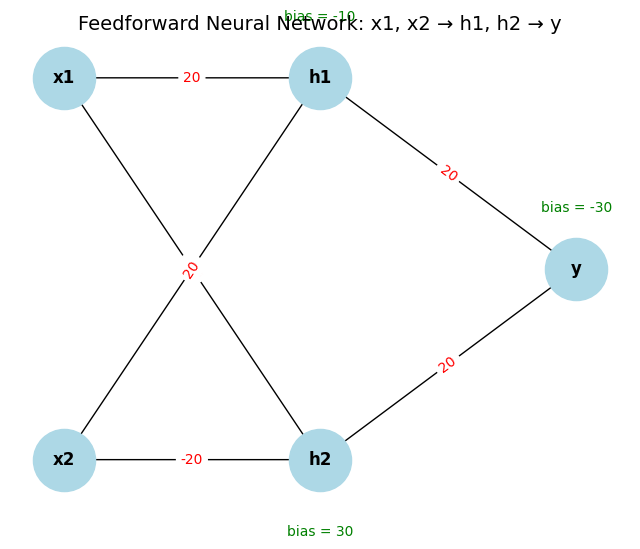

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Create the graph
G = nx.DiGraph()

# Add nodes for input, hidden, and output layers
G.add_node("x1")
G.add_node("x2")
G.add_node("h1")
G.add_node("h2")
G.add_node("y")

# Add weighted edges: input to hidden
G.add_edge("x1", "h1", weight=20)
G.add_edge("x2", "h1", weight=20)
G.add_edge("x1", "h2", weight=-20)
G.add_edge("x2", "h2", weight=-20)

# Hidden to output
G.add_edge("h1", "y", weight=20)
G.add_edge("h2", "y", weight=20)

# Define node positions manually
pos = {
    "x1": (-1, 1),
    "x2": (-1, -1),
    "h1": (0, 1),
    "h2": (0, -1),
    "y": (1, 0)
}

# Set up figure
fig, ax = plt.subplots(figsize=(8, 6))

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue', ax=ax)
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color='black', ax=ax)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', ax=ax)

# Add edge labels (weights)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10, ax=ax)

# Add bias annotations manually
ax.text(0, 1.3, "bias = -10", color='green', fontsize=10, ha='center')
ax.text(0, -1.4, "bias = 30", color='green', fontsize=10, ha='center')
ax.text(1, 0.3, "bias = -30", color='green', fontsize=10, ha='center')

ax.set_title("Feedforward Neural Network: x1, x2 → h1, h2 → y", fontsize=14)
ax.axis("off")
#plt.show()
